<a href="https://colab.research.google.com/github/perinai/End/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np # Often useful too

In [2]:
# Replace 'your_dataset.csv' with the actual name of your uploaded file
file_path = 'yield.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Make sure you've uploaded it and the name is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully!


In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400  


In [4]:
print("\nLast 5 rows of the dataset:")
print(df.tail())


Last 5 rows of the dataset:
      Domain Code Domain  Area Code      Area  Element Code Element  \
56712          QC  Crops        181  Zimbabwe          5419   Yield   
56713          QC  Crops        181  Zimbabwe          5419   Yield   
56714          QC  Crops        181  Zimbabwe          5419   Yield   
56715          QC  Crops        181  Zimbabwe          5419   Yield   
56716          QC  Crops        181  Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
56712         15  Wheat       2012  2012  hg/ha  24420  
56713         15  Wheat       2013  2013  hg/ha  22888  
56714         15  Wheat       2014  2014  hg/ha  21357  
56715         15  Wheat       2015  2015  hg/ha  19826  
56716         15  Wheat       2016  2016  hg/ha  18294  


In [5]:
print(f"\nDataset shape (rows, columns): {df.shape}")


Dataset shape (rows, columns): (56717, 12)


In [6]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [7]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Area Code  Element Code     Item Code     Year Code          Year  \
count  56717.000000       56717.0  56717.000000  56717.000000  56717.000000   
mean     125.650422        5419.0    111.611651   1989.669570   1989.669570   
std       75.120195           0.0    101.278435     16.133198     16.133198   
min        1.000000        5419.0     15.000000   1961.000000   1961.000000   
25%       58.000000        5419.0     56.000000   1976.000000   1976.000000   
50%      122.000000        5419.0    116.000000   1991.000000   1991.000000   
75%      184.000000        5419.0    125.000000   2004.000000   2004.000000   
max      351.000000        5419.0    489.000000   2016.000000   2016.000000   

                Value  
count    56717.000000  
mean     62094.660084  
std      67835.932856  
min          0.000000  
25%      15680.000000  
50%      36744.000000  
75%      86213.000000  
max    1000000.000000  


In [8]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 4.1: Drop Redundant/Constant Columns ---
# Let's verify the uniqueness of the columns we suspect are constant
print("Unique values in 'Domain Code':", df['Domain Code'].unique())
print("Unique values in 'Domain':", df['Domain'].unique())
print("Unique values in 'Element Code':", df['Element Code'].unique())
print("Unique values in 'Element':", df['Element'].unique())
print("Unique values in 'Unit':", df['Unit'].unique())
print("Are 'Year Code' and 'Year' identical?", df['Year Code'].equals(df['Year']))

columns_to_drop = []
if len(df['Domain Code'].unique()) == 1:
    columns_to_drop.append('Domain Code')
if len(df['Domain'].unique()) == 1:
    columns_to_drop.append('Domain')
if len(df['Element Code'].unique()) == 1:
    columns_to_drop.append('Element Code')
if len(df['Element'].unique()) == 1:
    columns_to_drop.append('Element')
if len(df['Unit'].unique()) == 1:
    columns_to_drop.append('Unit')
if df['Year Code'].equals(df['Year']):
    columns_to_drop.append('Year Code') # Keep 'Year' as it's more intuitive

df_cleaned = df.drop(columns=columns_to_drop)
print(f"\nDropped columns: {columns_to_drop}")
print("Shape of DataFrame after dropping columns:", df_cleaned.shape)
print("Remaining columns:", df_cleaned.columns)

# --- 4.2: Rename 'Value' column to 'Yield' for clarity ---
df_cleaned = df_cleaned.rename(columns={'Value': 'Yield_hg_ha'})
print("\nRenamed 'Value' column to 'Yield_hg_ha'")
print(df_cleaned.head(3))

# --- 4.3: Examine 'Area Code' vs 'Area' and 'Item Code' vs 'Item' ---
# If Area Code uniquely identifies Area, and Item Code uniquely identifies Item,
# we might consider using the codes, or encoding the text columns.
# For now, we'll keep both and decide during preprocessing which to use.
# Let's check the number of unique values.
print(f"\nNumber of unique Areas: {df_cleaned['Area'].nunique()}")
print(f"Number of unique Area Codes: {df_cleaned['Area Code'].nunique()}")
print(f"Number of unique Items: {df_cleaned['Item'].nunique()}")
print(f"Number of unique Item Codes: {df_cleaned['Item Code'].nunique()}")

# For simplicity in initial modeling, we might focus on 'Area', 'Item', and 'Year' as primary features.
# We can drop 'Area Code' and 'Item Code' if we decide to encode 'Area' and 'Item'.
# Let's keep them for now and select features explicitly later.

Unique values in 'Domain Code': ['QC']
Unique values in 'Domain': ['Crops']
Unique values in 'Element Code': [5419]
Unique values in 'Element': ['Yield']
Unique values in 'Unit': ['hg/ha']
Are 'Year Code' and 'Year' identical? True

Dropped columns: ['Domain Code', 'Domain', 'Element Code', 'Element', 'Unit', 'Year Code']
Shape of DataFrame after dropping columns: (56717, 6)
Remaining columns: Index(['Area Code', 'Area', 'Item Code', 'Item', 'Year', 'Value'], dtype='object')

Renamed 'Value' column to 'Yield_hg_ha'
   Area Code         Area  Item Code   Item  Year  Yield_hg_ha
0          2  Afghanistan         56  Maize  1961        14000
1          2  Afghanistan         56  Maize  1962        14000
2          2  Afghanistan         56  Maize  1963        14260

Number of unique Areas: 212
Number of unique Area Codes: 212
Number of unique Items: 10
Number of unique Item Codes: 10


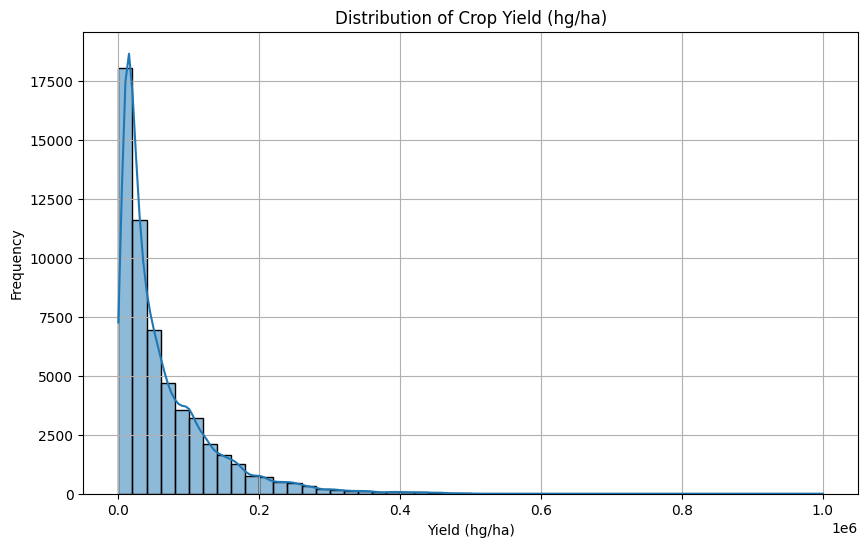

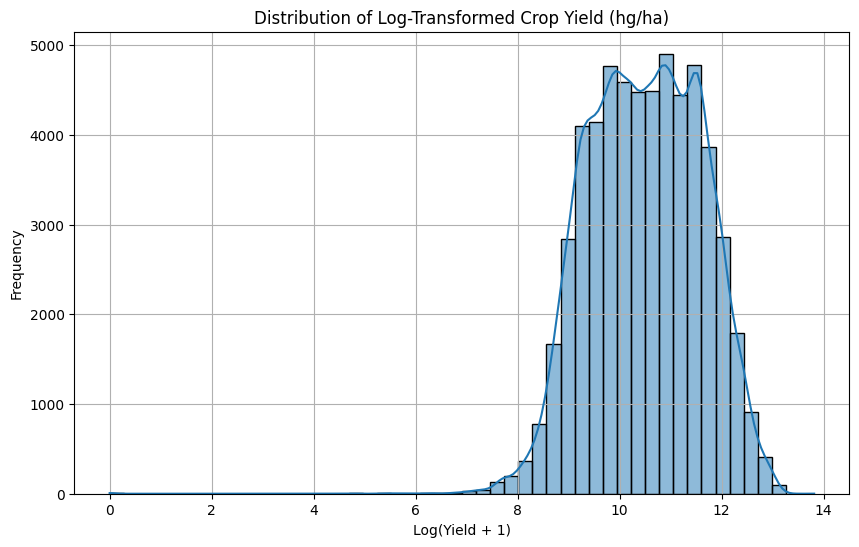

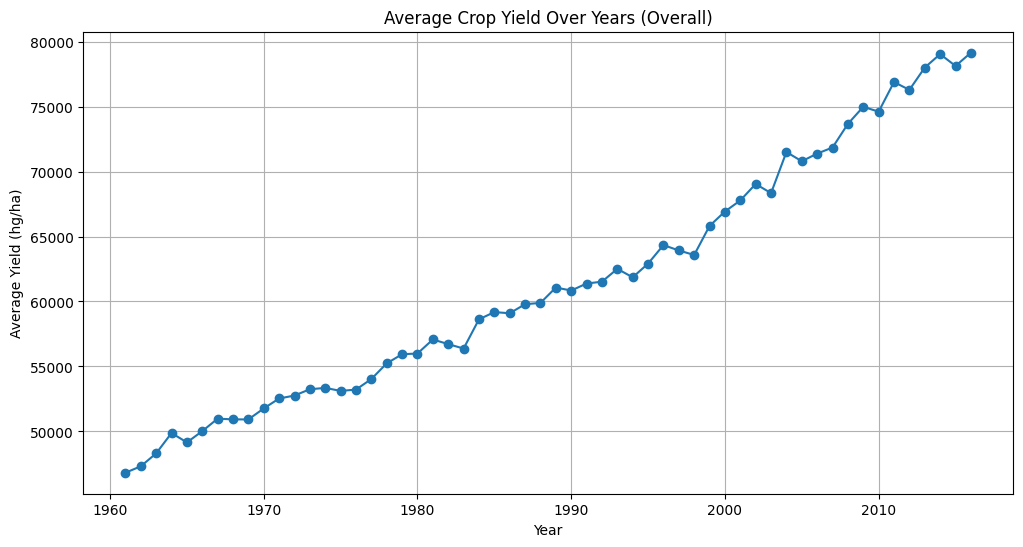

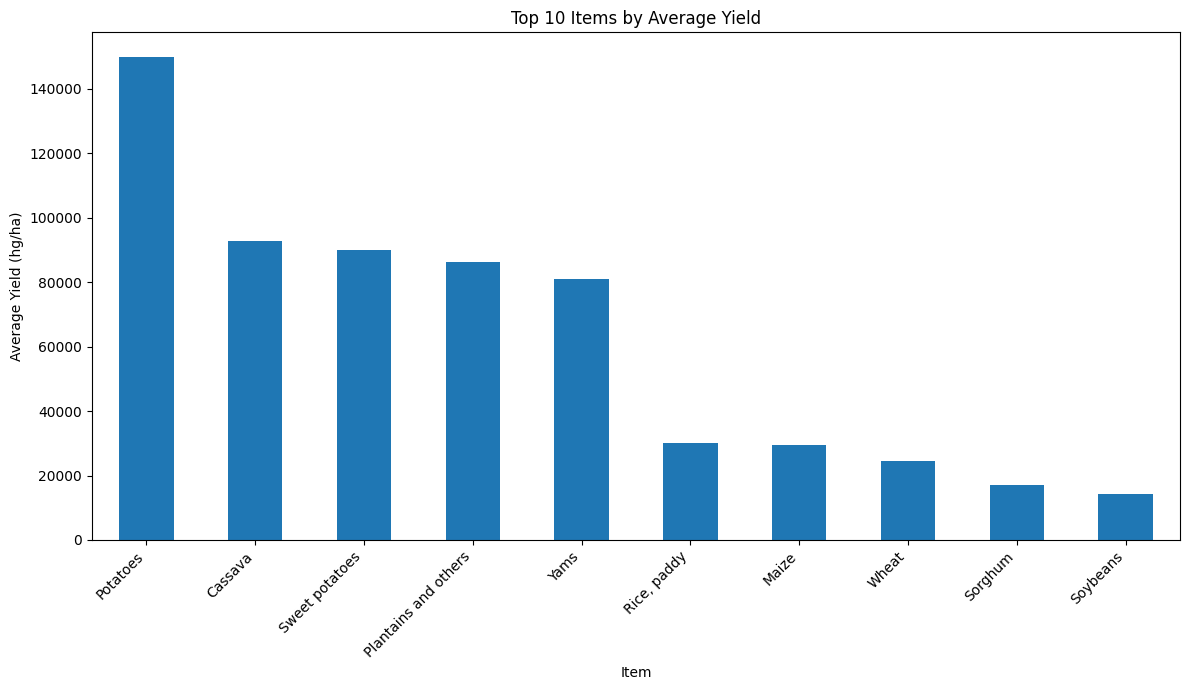


Top Items by average yield:
Item
Potatoes                150083.237176
Cassava                  92768.762854
Sweet potatoes           89885.121460
Plantains and others     86282.765637
Yams                     80903.501587
Name: Yield_hg_ha, dtype: float64


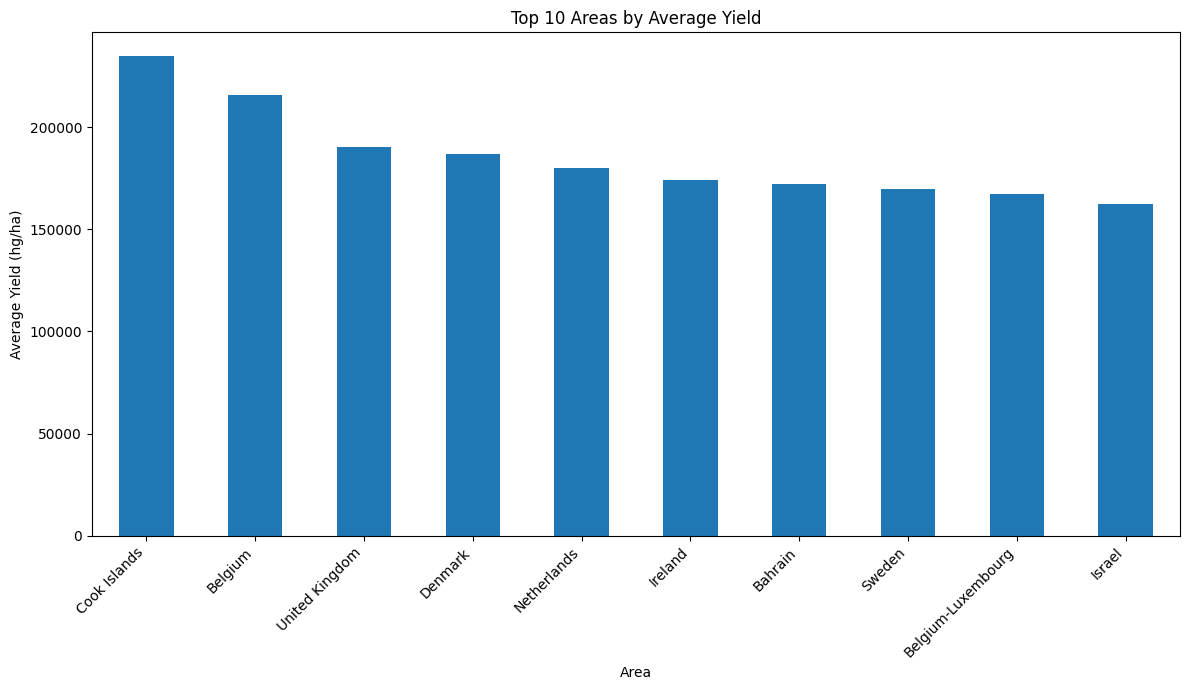


Top Areas by average yield:
Area
Cook Islands      234591.392857
Belgium           215905.450980
United Kingdom    190226.016260
Denmark           186669.386555
Netherlands       179758.190476
Name: Yield_hg_ha, dtype: float64


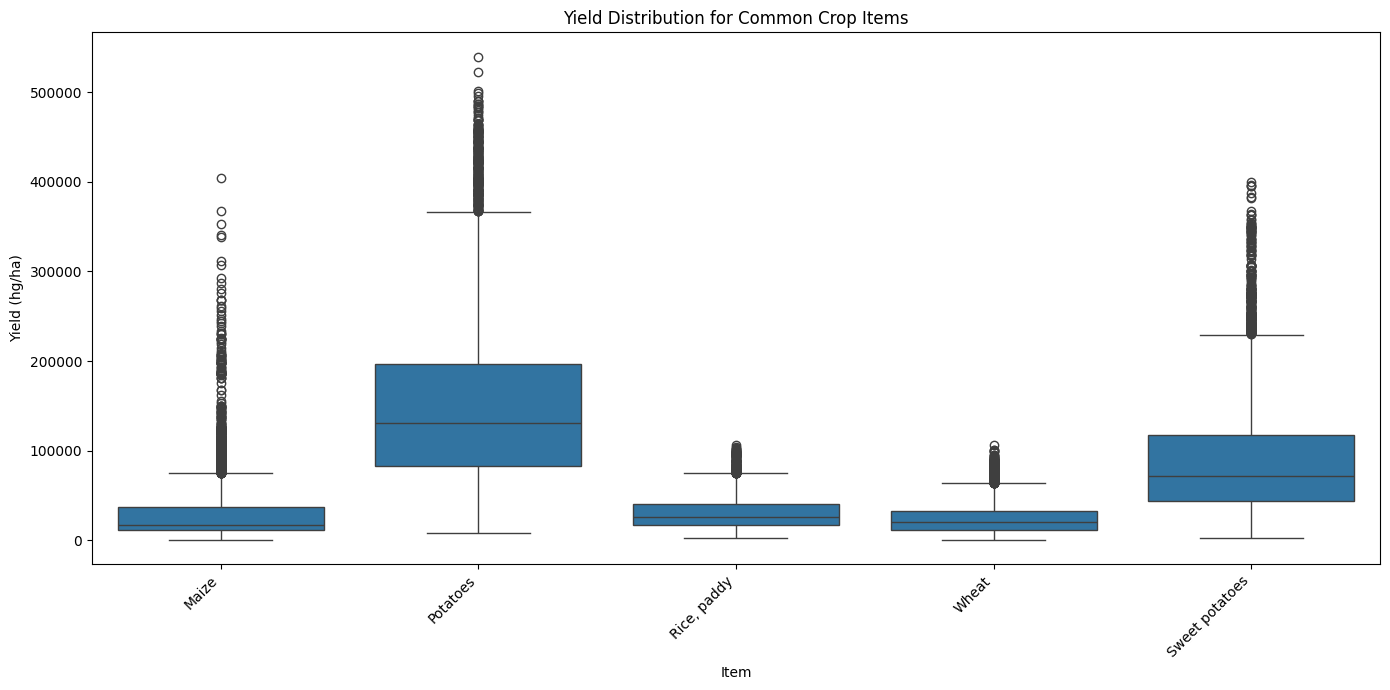

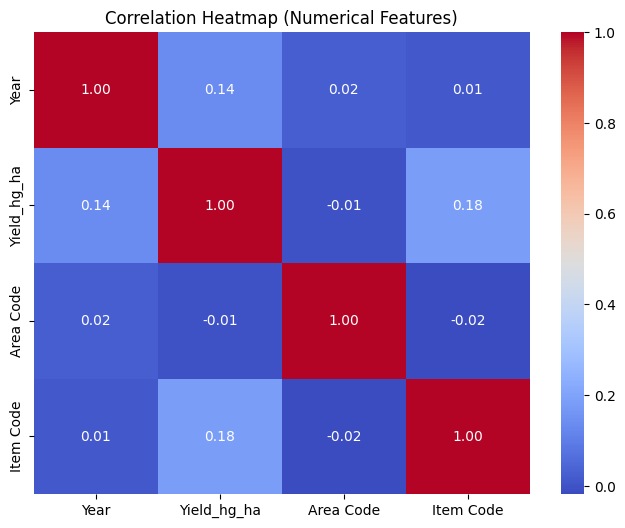

In [10]:
# --- 5.1: Distribution of the Target Variable ('Yield_hg_ha') ---
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Yield_hg_ha'], kde=True, bins=50)
plt.title('Distribution of Crop Yield (hg/ha)')
plt.xlabel('Yield (hg/ha)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# It might be highly skewed, consider a log transform for visualization if needed
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_cleaned['Yield_hg_ha']), kde=True, bins=50) # log1p handles zeros
plt.title('Distribution of Log-Transformed Crop Yield (hg/ha)')
plt.xlabel('Log(Yield + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# --- 5.2: Yield over Years (Overall Trend) ---
plt.figure(figsize=(12, 6))
average_yield_per_year = df_cleaned.groupby('Year')['Yield_hg_ha'].mean()
average_yield_per_year.plot(kind='line', marker='o')
plt.title('Average Crop Yield Over Years (Overall)')
plt.xlabel('Year')
plt.ylabel('Average Yield (hg/ha)')
plt.grid(True)
plt.show()

# --- 5.3: Top N Items by Average Yield ---
top_n = 10
avg_yield_per_item = df_cleaned.groupby('Item')['Yield_hg_ha'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
avg_yield_per_item.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Items by Average Yield')
plt.xlabel('Item')
plt.ylabel('Average Yield (hg/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop Items by average yield:")
print(avg_yield_per_item.head())

# --- 5.4: Top N Areas (Countries) by Average Yield ---
avg_yield_per_area = df_cleaned.groupby('Area')['Yield_hg_ha'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
avg_yield_per_area.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Areas by Average Yield')
plt.xlabel('Area')
plt.ylabel('Average Yield (hg/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop Areas by average yield:")
print(avg_yield_per_area.head())

# --- 5.5: Boxplot of Yield for some selected Items ---
# Get a few common items to avoid overcrowding the plot
common_items = df_cleaned['Item'].value_counts().nlargest(5).index
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_cleaned[df_cleaned['Item'].isin(common_items)], x='Item', y='Yield_hg_ha')
plt.title('Yield Distribution for Common Crop Items')
plt.xlabel('Item')
plt.ylabel('Yield (hg/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# --- 5.6: Correlation Heatmap (for numerical features primarily, before encoding) ---
# We only have 'Year' and 'Yield_hg_ha' as primary numerical features for now.
# (Area Code and Item Code are also numerical but represent categories).
numerical_df_for_corr = df_cleaned[['Year', 'Yield_hg_ha', 'Area Code', 'Item Code']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np # Ensure numpy is imported

# --- 6.1: Feature Selection ---
# For our initial model, let's use 'Area', 'Item', and 'Year' as primary features.
# We'll encode 'Area' and 'Item'.

# Define features (X) and target (y)
# We'll use the df_cleaned from the previous EDA step
if 'df_cleaned' not in locals(): # Check if df_cleaned exists
    print("Error: df_cleaned not found. Please run the cleaning steps first.")
    # Re-run minimal cleaning if necessary (ensure this matches your previous steps)
    columns_to_drop = ['Domain Code', 'Domain', 'Element Code', 'Element', 'Unit', 'Year Code']
    df_cleaned = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' if some are already dropped
    df_cleaned = df_cleaned.rename(columns={'Value': 'Yield_hg_ha'})
    print("Re-ran minimal cleaning.")


# Let's select a subset of features for simplicity first
# We will handle 'Area' and 'Item' (categorical) and 'Year' (numerical)
features = ['Area', 'Item', 'Year']
target = 'Yield_hg_ha'

X = df_cleaned[features]
y = df_cleaned[target]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())

# --- 6.2: Train-Test Split ---
# It's often good practice to split before encoding to prevent data leakage,
# especially with target-based encoders. For LabelEncoder or OneHotEncoder,
# it's less critical but still good practice.
# A random split is common, but for time-series data, a chronological split can be better.
# Let's start with a random split for simplicity.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set size: X_test {X_test.shape}, y_test {y_test.shape}")


# --- 6.3: Preprocessing Pipeline (Encoding and Scaling) ---
# We have categorical features ('Area', 'Item') and a numerical feature ('Year').

# Define which columns are categorical and numerical
categorical_features = ['Area', 'Item']
numerical_features = ['Year']

# Create preprocessing pipelines for numerical and categorical features
# For numerical features: Standard Scaling
numerical_transformer = StandardScaler()

# For categorical features: One-Hot Encoding
# OneHotEncoder can create many columns if 'Area' has many unique values.
# Let's check unique values to be mindful.
print(f"\nUnique 'Area' in training: {X_train['Area'].nunique()}")
print(f"Unique 'Item' in training: {X_train['Item'].nunique()}")

# If 'Area' has too many unique values, OneHotEncoding might be problematic.
# Alternatives:
# 1. Use 'Area Code' if it's a good numerical representation (requires it to be in X).
# 2. Target Encoding (more complex, prone to leakage if not careful).
# 3. Hashing Trick.
# 4. Limit to top N areas and group others as 'Other'.
# For now, let's proceed with OneHotEncoder but be aware of potential high dimensionality.
# handle_unknown='ignore' will prevent errors if test set has new categories not seen in train.
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for easier handling with pandas

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) not specified
)

# --- Apply the preprocessor ---
# Fit on training data and transform both training and testing data
# Note: It's generally better to fit the preprocessor as part of a scikit-learn Pipeline
# with the model, but for understanding, let's do it step-by-step first.

# Fit the preprocessor on the training data
print("\nFitting preprocessor on X_train...")
preprocessor.fit(X_train)

# Transform training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# The output of ColumnTransformer is a NumPy array. Let's get feature names for inspection.
# Get feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# Convert processed arrays back to DataFrames (optional, but good for inspection)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names, index=X_test.index)

print(f"\nShape of X_train_processed: {X_train_processed_df.shape}")
print("First 3 rows of X_train_processed_df:")
print(X_train_processed_df.head(3))

# If X_train_processed_df.shape[1] is very large due to 'Area' one-hot encoding,
# this confirms the high dimensionality issue.

Shape of X: (56717, 3)
Shape of y: (56717,)

First 5 rows of X:
          Area   Item  Year
0  Afghanistan  Maize  1961
1  Afghanistan  Maize  1962
2  Afghanistan  Maize  1963
3  Afghanistan  Maize  1964
4  Afghanistan  Maize  1965

Training set size: X_train (45373, 3), y_train (45373,)
Testing set size: X_test (11344, 3), y_test (11344,)

Unique 'Area' in training: 212
Unique 'Item' in training: 10

Fitting preprocessor on X_train...

Shape of X_train_processed: (45373, 223)
First 3 rows of X_train_processed_df:
           Year  Area_Afghanistan  Area_Albania  Area_Algeria  \
30961 -0.229973               0.0           0.0           0.0   
30234 -1.097047               0.0           0.0           0.0   
54072 -0.601576               0.0           0.0           0.0   

       Area_American Samoa  Area_Angola  Area_Antigua and Barbuda  \
30961                  0.0          0.0                       0.0   
30234                  0.0          0.0                       0.0   
54072       

In [12]:
# --- 7.1: Define models ---
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1), # n_jobs=-1 uses all cores
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# --- 7.2: Train and Evaluate Models ---
results = {}

print("\n--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Create a full pipeline with preprocessing and the model
    # This is the recommended scikit-learn way
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Train the pipeline
    pipeline.fit(X_train, y_train) # Fit on original X_train, pipeline handles preprocessing

    # Make predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Evaluate
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)

    results[name] = {
        "MAE_train": mae_train, "RMSE_train": rmse_train, "R2_train": r2_train,
        "MAE_test": mae_test, "RMSE_test": rmse_test, "R2_test": r2_test
    }

    print(f"Results for {name}:")
    print(f"  Train MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.4f}")
    print(f"  Test  MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.4f}")

# --- 7.3: Display Results ---
results_df = pd.DataFrame(results).T # Transpose for better readability
print("\n\n--- Overall Model Comparison (Test Set) ---")
print(results_df[['MAE_test', 'RMSE_test', 'R2_test']].sort_values(by='R2_test', ascending=False))


--- Model Training and Evaluation ---

Training Linear Regression...
Results for Linear Regression:
  Train MAE: 26651.13, RMSE: 39146.57, R2: 0.6667
  Test  MAE: 26516.62, RMSE: 39017.72, R2: 0.6703

Training Decision Tree...
Results for Decision Tree:
  Train MAE: 0.00, RMSE: 0.00, R2: 1.0000
  Test  MAE: 6130.37, RMSE: 15040.95, R2: 0.9510

Training Random Forest...
Results for Random Forest:
  Train MAE: 1913.85, RMSE: 4920.88, R2: 0.9947
  Test  MAE: 5304.25, RMSE: 12486.08, R2: 0.9662

Training Gradient Boosting...
Results for Gradient Boosting:
  Train MAE: 26878.51, RMSE: 40095.77, R2: 0.6503
  Test  MAE: 27120.33, RMSE: 40371.52, R2: 0.6470


--- Overall Model Comparison (Test Set) ---
                       MAE_test     RMSE_test   R2_test
Random Forest       5304.248127  12486.078951  0.966237
Decision Tree       6130.374295  15040.947609  0.951007
Linear Regression  26516.622070  39017.719173  0.670306
Gradient Boosting  27120.334571  40371.515772  0.647031


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint # For pretty printing dictionaries

# --- 8.1: Hyperparameter Tuning for Random Forest ---
print("\n--- Hyperparameter Tuning for Random Forest ---")

# Define the parameter grid to search
# Note: This is a starting point. You might need to adjust ranges based on initial results.
param_dist_rf = {
    'regressor__n_estimators': [100, 200, 300], # Number of trees
    'regressor__max_depth': [None, 10, 20, 30],    # Max depth of trees
    'regressor__min_samples_split': [2, 5, 10],   # Min samples to split a node
    'regressor__min_samples_leaf': [1, 2, 4],     # Min samples in a leaf node
    'regressor__max_features': ['sqrt', 'log2', None] # Number of features to consider for best split
                                                     # 'auto' is equivalent to 'sqrt' for RF regressor
                                                     # None means max_features = n_features
}

# Create the Random Forest Regressor instance (to be used within the pipeline)
rf_model_for_tuning = RandomForestRegressor(random_state=42, n_jobs=-1)

# Create the full pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', rf_model_for_tuning)])

# Randomized Search - n_iter controls how many random combinations are tried.
# cv is the number of cross-validation folds.
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=5,  # Try 20 different combinations (adjust as needed, more iterations take longer)
    cv=2,       # 3-fold cross-validation (adjust as needed)
    verbose=2,  # Shows progress
    random_state=42,
    n_jobs=-1,  # Use all available cores
    scoring='r2' # Evaluate based on R2 score
)

print("Starting RandomizedSearchCV for Random Forest...")
random_search_rf.fit(X_train, y_train)

print("\nBest parameters found for Random Forest:")
pprint(random_search_rf.best_params_)

print(f"\nBest R2 score from RandomizedSearchCV (on CV folds): {random_search_rf.best_score_:.4f}")

# Get the best estimator
best_rf_model = random_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
y_pred_test_best_rf = best_rf_model.predict(X_test)

mae_test_best_rf = mean_absolute_error(y_test, y_pred_test_best_rf)
rmse_test_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_best_rf))
r2_test_best_rf = r2_score(y_test, y_pred_test_best_rf)

print("\nPerformance of Best Random Forest on Test Set:")
print(f"  Test MAE: {mae_test_best_rf:.2f}")
print(f"  Test RMSE: {rmse_test_best_rf:.2f}")
print(f"  Test R2: {r2_test_best_rf:.4f}")

# Add to results for comparison
results["Random Forest (Tuned)"] = {
    "MAE_train": None, "RMSE_train": None, "R2_train": None, # We didn't explicitly re-evaluate on full train set here
    "MAE_test": mae_test_best_rf, "RMSE_test": rmse_test_best_rf, "R2_test": r2_test_best_rf
}


--- Hyperparameter Tuning for Random Forest ---
Starting RandomizedSearchCV for Random Forest...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best parameters found for Random Forest:
{'regressor__max_depth': None,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 2,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 100}

Best R2 score from RandomizedSearchCV (on CV folds): 0.9235

Performance of Best Random Forest on Test Set:
  Test MAE: 6654.49
  Test RMSE: 13165.63
  Test R2: 0.9625



--- Feature Importances ---

Top 20 most important features:
                           feature  importance
216                  Item_Potatoes    0.220203
0                             Year    0.088297
221                     Item_Wheat    0.040697
218                   Item_Sorghum    0.039111
214                     Item_Maize    0.038395
219                  Item_Soybeans    0.037626
220            Item_Sweet potatoes    0.031222
213                   Item_Cassava    0.028885
217               Item_Rice, paddy    0.024444
97                     Area_Israel    0.017853
215      Item_Plantains and others    0.012516
202  Area_United States of America    0.012152
133               Area_Netherlands    0.012065
46               Area_Cook Islands    0.011544
135               Area_New Zealand    0.011256
222                      Item_Yams    0.010669
18         Area_Belgium-Luxembourg    0.010318
200            Area_United Kingdom    0.009851
100                     Area_Japan    0.00950

<ipython-input-16-5b70416ba771>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_df.head(20), palette='viridis')


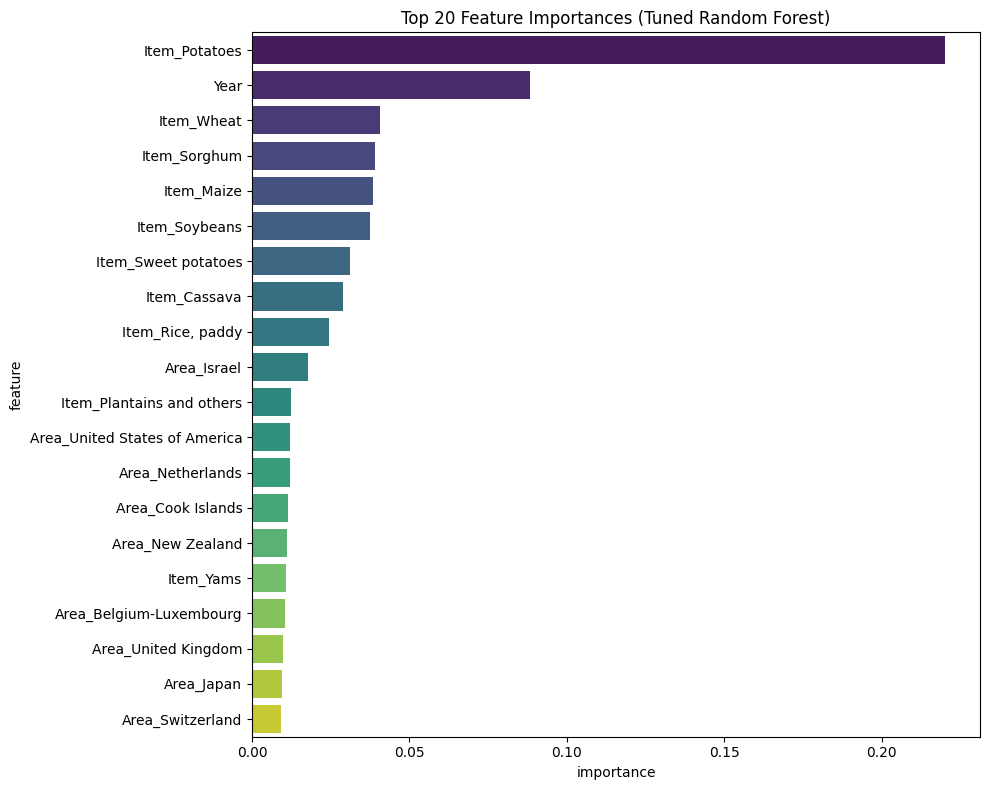

In [16]:
# --- 9.1: Feature Importances from the Tuned Random Forest ---
print("\n--- Feature Importances ---")

# The 'regressor' step in our best_rf_model pipeline is the actual RandomForestRegressor
# The 'preprocessor' step contains the transformers, including OneHotEncoder

try:
    # Get the trained RandomForestRegressor model from the pipeline
    actual_rf_model = best_rf_model.named_steps['regressor']
    importances = actual_rf_model.feature_importances_

    # Get feature names from the preprocessor step
    # These are the names after one-hot encoding etc.
    # We already created 'all_feature_names' when we first applied the preprocessor
    # Ensure 'all_feature_names' is available and matches the output of the preprocessor in the pipeline
    # If not, regenerate it:
    # numerical_features = ['Year'] # from previous definition
    # categorical_features = ['Area', 'Item'] # from previous definition
    # ohe_feature_names_from_pipeline = best_rf_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
    # all_feature_names_from_pipeline = numerical_features + list(ohe_feature_names_from_pipeline)

    # Let's use the 'all_feature_names' we created earlier when inspecting X_train_processed_df
    # Verify its length matches the number of importances
    if len(all_feature_names) == len(importances):
        feature_importances_df = pd.DataFrame({
            'feature': all_feature_names,
            'importance': importances
        }).sort_values(by='importance', ascending=False)

        print("\nTop 20 most important features:")
        print(feature_importances_df.head(20))

        # Plot feature importances
        plt.figure(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', data=feature_importances_df.head(20), palette='viridis')
        plt.title('Top 20 Feature Importances (Tuned Random Forest)')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Mismatch in feature names length ({len(all_feature_names)}) and importances length ({len(importances)}).")
        print("Cannot display feature importances with names. Check preprocessor output.")
        print("Importances raw:", importances[:20])


except Exception as e:
    print(f"Error extracting feature importances: {e}")
    print("The model might not have feature_importances_ or naming retrieval failed.")


Top 20 most important features (Default Random Forest):
                           feature  importance
216                  Item_Potatoes    0.272390
0                             Year    0.102335
220            Item_Sweet potatoes    0.061235
213                   Item_Cassava    0.053874
222                      Item_Yams    0.033845
215      Item_Plantains and others    0.032598
97                     Area_Israel    0.019948
202  Area_United States of America    0.012937
133               Area_Netherlands    0.012210
135               Area_New Zealand    0.011927
100                     Area_Japan    0.011023
18         Area_Belgium-Luxembourg    0.010290
184               Area_Switzerland    0.009917
200            Area_United Kingdom    0.009092
46               Area_Cook Islands    0.009045
72                     Area_France    0.009005
61                      Area_Egypt    0.008156
56                    Area_Denmark    0.007935
78                    Area_Germany    0.007928
9  

<ipython-input-17-cc7d275bc9f2>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_df_default.head(20), palette='viridis')


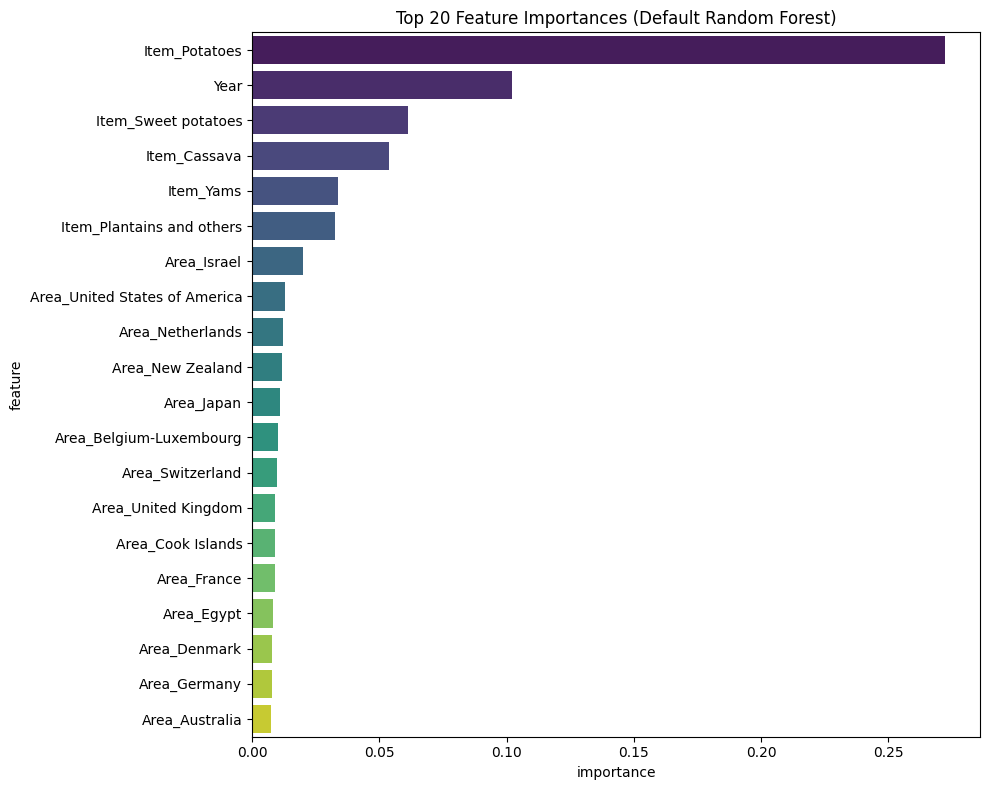

In [17]:
# If you want to get feature importances from the original default RF:
# Ensure the preprocessor is fitted correctly for this path
# Re-create the pipeline for the default RF
default_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1))])
# Fit it on the full training data
default_rf_pipeline.fit(X_train, y_train)

# Then get the actual model and feature names
actual_rf_model_default = default_rf_pipeline.named_steps['regressor']
importances_default = actual_rf_model_default.feature_importances_

# Get feature names (ensure 'all_feature_names' is correctly defined from preprocessor on X_train)
# This was defined as:
# ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# all_feature_names = numerical_features + list(ohe_feature_names)
# (Make sure this preprocessor was the one fit on X_train)

if len(all_feature_names) == len(importances_default):
    feature_importances_df_default = pd.DataFrame({
        'feature': all_feature_names,
        'importance': importances_default
    }).sort_values(by='importance', ascending=False)

    print("\nTop 20 most important features (Default Random Forest):")
    print(feature_importances_df_default.head(20))

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=feature_importances_df_default.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances (Default Random Forest)')
    plt.tight_layout()
    plt.show()
else:
    print("Mismatch in feature names and importances length for default RF.")